# Accute Inflamations data using Decision Trees

In [123]:
import numpy as np
import pandas as pd
import math
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff
from sklearn import metrics
from sklearn import datasets, linear_model
from sklearn.feature_selection import chi2
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression, LinearRegression, RidgeCV, LassoCV
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold 
from sklearn.naive_bayes import MultinomialNB
import statsmodels.api as sm
from sklearn.utils import resample
from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV
import statsmodels.graphics as smgraphics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.formula.api as smf
from sklearn import neighbors, tree
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean, std
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, ExtraTreesClassifier
from sklearn.metrics import accuracy_score

Download the data from https://archive.ics.uci.edu/
ml/datasets/Acute+Inflammations 

In [124]:
headers = ['Temperature of patient', 'Occurence of nausea', 'Lumbar pain', 'Urine pushing', 'Micturition pains', 'Burning of urethra', 'decision: Inflammation of urinary bladder', 'decision: Nephritis of renal pelvis origin']
df = pd.read_csv("diagnosis.data", encoding="utf-16", sep='\t', names=headers, decimal=',')
df['Occurence of nausea'] = df['Occurence of nausea'].map({'yes':1, 'no': 0})
df['Lumbar pain'] = df['Lumbar pain'].map({'yes':1, 'no': 0})
df['Urine pushing'] = df['Urine pushing'].map({'yes':1, 'no': 0})
df['Micturition pains'] = df['Micturition pains'].map({'yes':1, 'no': 0})
df['Burning of urethra'] = df['Burning of urethra'].map({'yes':1, 'no': 0})
df['decision: Inflammation of urinary bladder'] = df['decision: Inflammation of urinary bladder'].map({'yes':1, 'no': 0})
df['decision: Nephritis of renal pelvis origin'] = df['decision: Nephritis of renal pelvis origin'].map({'yes':1, 'no': 0})
df

,Temperature of patient,Occurence of nausea,Lumbar pain,Urine pushing,Micturition pains,Burning of urethra,decision: Inflammation of urinary bladder,decision: Nephritis of renal pelvis origin
0,35.5,0,1,0,0,0,0,0
1,35.9,0,0,1,1,1,1,0
2,35.9,0,1,0,0,0,0,0
3,36.0,0,0,1,1,1,1,0
4,36.0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
115,41.4,0,1,1,0,1,0,1
116,41.5,0,0,0,0,0,0,0
117,41.5,1,1,0,1,0,0,1
118,41.5,0,1,1,0,1,0,1


# Building a decision Tree

[Text(133.92000000000002, 195.696, 'Temperature of patient <= 37.95\ngini = 0.493\nsamples = 120\nvalue = [[61, 59]\n[70, 50]]'),
 Text(66.96000000000001, 152.208, 'Lumbar pain <= 0.5\ngini = 0.222\nsamples = 60\nvalue = [[20, 40]\n[60, 0]]'),
 Text(33.480000000000004, 108.72, 'gini = 0.0\nsamples = 40\nvalue = [[0, 40]\n[40, 0]]'),
 Text(100.44000000000001, 108.72, 'gini = 0.0\nsamples = 20\nvalue = [[20, 0]\n[20, 0]]'),
 Text(200.88000000000002, 152.208, 'Lumbar pain <= 0.5\ngini = 0.355\nsamples = 60\nvalue = [[41, 19]\n[10, 50]]'),
 Text(167.40000000000003, 108.72, 'gini = 0.0\nsamples = 10\nvalue = [[10, 0]\n[10, 0]]'),
 Text(234.36, 108.72, 'Occurence of nausea <= 0.5\ngini = 0.236\nsamples = 50\nvalue = [[31, 19]\n[0, 50]]'),
 Text(200.88000000000002, 65.232, 'gini = 0.0\nsamples = 21\nvalue = [[21, 0]\n[0, 21]]'),
 Text(267.84000000000003, 65.232, 'Urine pushing <= 0.5\ngini = 0.226\nsamples = 29\nvalue = [[10, 19]\n[0, 29]]'),
 Text(234.36, 21.744, 'gini = 0.0\nsamples = 10\nv

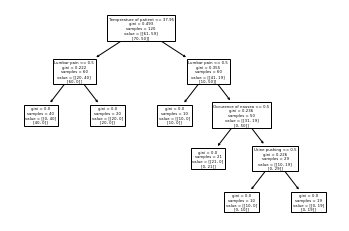

In [125]:
X = pd.DataFrame()
y = pd.DataFrame()
y = df[['decision: Inflammation of urinary bladder', 'decision: Nephritis of renal pelvis origin']]
X = df.drop(['decision: Inflammation of urinary bladder', 'decision: Nephritis of renal pelvis origin'], axis = 1)
feature_names = ['Temperature of patient', 'Occurence of nausea', 'Lumbar pain', 'Urine pushing', 'Micturition pains', 'Burning of urethra']

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)

tree.plot_tree(clf, feature_names = feature_names)

# Convert the decision rules into a set of IF-THEN rules

In [126]:
if_then = tree.export_text(clf, feature_names = feature_names)
print(if_then)

|--- Temperature of patient <= 37.95
|   |--- Lumbar pain <= 0.50
|   |   |--- class: 1
|   |--- Lumbar pain >  0.50
|   |   |--- class: 0
|--- Temperature of patient >  37.95
|   |--- Lumbar pain <= 0.50
|   |   |--- class: 0
|   |--- Lumbar pain >  0.50
|   |   |--- Occurence of nausea <= 0.50
|   |   |   |--- class: 0
|   |   |--- Occurence of nausea >  0.50
|   |   |   |--- Urine pushing <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- Urine pushing >  0.50
|   |   |   |   |--- class: 0



# Cost complexity pruning

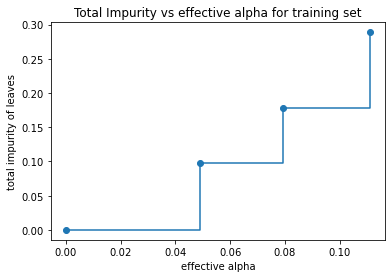

In [127]:
clf = tree.DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X, y)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots();
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post");
ax.set_xlabel("effective alpha");
ax.set_ylabel("total impurity of leaves");
ax.set_title("Total Impurity vs effective alpha for training set");

In [129]:
test_accuracy = []
for i in ccp_alphas:
    DTC = DecisionTreeClassifier(ccp_alpha = i)
    DTC.fit(X, y)
    y_test_pred = DTC.predict(X)
    test_accuracy.append(metrics.mean_squared_error(y, y_test_pred))

[Text(133.92000000000002, 195.696, 'Temperature of patient <= 37.95\ngini = 0.493\nsamples = 120\nvalue = [[61, 59]\n[70, 50]]'),
 Text(66.96000000000001, 152.208, 'Lumbar pain <= 0.5\ngini = 0.222\nsamples = 60\nvalue = [[20, 40]\n[60, 0]]'),
 Text(33.480000000000004, 108.72, 'gini = 0.0\nsamples = 40\nvalue = [[0, 40]\n[40, 0]]'),
 Text(100.44000000000001, 108.72, 'gini = 0.0\nsamples = 20\nvalue = [[20, 0]\n[20, 0]]'),
 Text(200.88000000000002, 152.208, 'Lumbar pain <= 0.5\ngini = 0.355\nsamples = 60\nvalue = [[41, 19]\n[10, 50]]'),
 Text(167.40000000000003, 108.72, 'gini = 0.0\nsamples = 10\nvalue = [[10, 0]\n[10, 0]]'),
 Text(234.36, 108.72, 'Occurence of nausea <= 0.5\ngini = 0.236\nsamples = 50\nvalue = [[31, 19]\n[0, 50]]'),
 Text(200.88000000000002, 65.232, 'gini = 0.0\nsamples = 21\nvalue = [[21, 0]\n[0, 21]]'),
 Text(267.84000000000003, 65.232, 'Urine pushing <= 0.5\ngini = 0.226\nsamples = 29\nvalue = [[10, 19]\n[0, 29]]'),
 Text(234.36, 21.744, 'gini = 0.0\nsamples = 10\nv

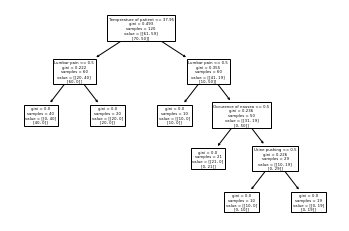

In [130]:
min_error = min(test_accuracy)
min_error_alpha = ccp_alphas[test_accuracy.index(min_error)]
clf = DecisionTreeClassifier(ccp_alpha = min_error_alpha)
clf = clf.fit(X,y)

tree.plot_tree(clf, feature_names = feature_names)

In [131]:
if_then = tree.export_text(clf, feature_names = feature_names)
print(if_then)

|--- Temperature of patient <= 37.95
|   |--- Lumbar pain <= 0.50
|   |   |--- class: 1
|   |--- Lumbar pain >  0.50
|   |   |--- class: 0
|--- Temperature of patient >  37.95
|   |--- Lumbar pain <= 0.50
|   |   |--- class: 0
|   |--- Lumbar pain >  0.50
|   |   |--- Occurence of nausea <= 0.50
|   |   |   |--- class: 0
|   |   |--- Occurence of nausea >  0.50
|   |   |   |--- Urine pushing <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- Urine pushing >  0.50
|   |   |   |   |--- class: 0



Random Forests, Ridge Regularized, and LASSO Regularized Regression

Download the communities dataset from https://archive.ics.uci.
edu/ml/datasets/Communities+and+Crime

In [7]:
header = []
for i in range(0, 128):
    header.append("Class " + str(i))
    
df = pd.read_csv("communities.data", sep=',', names=header, na_values=["?"])
df

,Class 0,Class 1,Class 2,Class 3,Class 4,Class 5,Class 6,Class 7,Class 8,Class 9,...,Class 118,Class 119,Class 120,Class 121,Class 122,Class 123,Class 124,Class 125,Class 126,Class 127
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.90,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,NaN,NaN,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,NaN,NaN,NaN,NaN,0.00,NaN,0.09
1990,6,NaN,NaN,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,NaN,NaN,NaN,NaN,0.00,NaN,0.45
1991,9,9.0,80070.0,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0.0,0.91,0.28,0.23
1992,25,17.0,72600.0,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0.0,0.22,0.18,0.19


Train/test split

In [8]:
trainingset = df.head(1495)
testingset = df.iloc[1495:]
testingset

,Class 0,Class 1,Class 2,Class 3,Class 4,Class 5,Class 6,Class 7,Class 8,Class 9,...,Class 118,Class 119,Class 120,Class 121,Class 122,Class 123,Class 124,Class 125,Class 126,Class 127
1495,6,NaN,NaN,MillValleycity,8,0.00,0.20,0.03,0.91,0.23,...,0.01,0.23,0.73,NaN,NaN,NaN,NaN,0.00,NaN,0.12
1496,48,NaN,NaN,LiveOakcity,8,0.00,0.55,0.13,0.78,0.15,...,0.01,0.18,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.11
1497,35,NaN,NaN,Portalescity,8,0.00,0.52,0.04,0.59,0.05,...,0.01,0.18,0.00,NaN,NaN,NaN,NaN,0.00,NaN,0.12
1498,42,17.0,25112.0,Fallstownship,8,0.04,0.51,0.07,0.92,0.09,...,0.06,0.13,0.16,NaN,NaN,NaN,NaN,0.00,NaN,0.06
1499,51,683.0,48952.0,Manassascity,8,0.03,0.59,0.20,0.75,0.19,...,0.03,0.23,0.06,NaN,NaN,NaN,NaN,0.00,NaN,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,NaN,NaN,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,NaN,NaN,NaN,NaN,0.00,NaN,0.09
1990,6,NaN,NaN,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,NaN,NaN,NaN,NaN,0.00,NaN,0.45
1991,9,9.0,80070.0,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0.0,0.91,0.28,0.23
1992,25,17.0,72600.0,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0.0,0.22,0.18,0.19


# Preprocessing missing data values

In [9]:
#non predictive features: US State, numeric code for county, numeric code for community, community name, fold.
#First 5 features are non predictive
trainingset = trainingset.iloc[:, 5:]
testingset = testingset.iloc[:, 5:]

In [10]:
df = df.iloc[:,5:]
df.replace('?', np.NaN)
df

,Class 5,Class 6,Class 7,Class 8,Class 9,Class 10,Class 11,Class 12,Class 13,Class 14,...,Class 118,Class 119,Class 120,Class 121,Class 122,Class 123,Class 124,Class 125,Class 126,Class 127
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.90,0.5,0.32,0.14,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.01,0.28,0.05,NaN,NaN,NaN,NaN,0.00,NaN,0.09
1990,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.02,0.37,0.20,NaN,NaN,NaN,NaN,0.00,NaN,0.45
1991,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.08,0.32,0.18,0.08,0.06,0.78,0.0,0.91,0.28,0.23
1992,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.03,0.38,0.33,0.02,0.02,0.79,0.0,0.22,0.18,0.19


In [11]:
#Replace with Median statistics
class_medians = df.median()
df = df.fillna(class_medians)
df

,Class 5,Class 6,Class 7,Class 8,Class 9,Class 10,Class 11,Class 12,Class 13,Class 14,...,Class 118,Class 119,Class 120,Class 121,Class 122,Class 123,Class 124,Class 125,Class 126,Class 127
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.90,0.5,0.32,0.14,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,0.08,0.03,0.75,0.5,0.00,0.15,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,0.08,0.03,0.75,0.5,0.00,0.15,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,0.08,0.03,0.75,0.5,0.00,0.15,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,0.08,0.03,0.75,0.5,0.00,0.15,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.01,0.28,0.05,0.08,0.03,0.75,0.5,0.00,0.15,0.09
1990,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.02,0.37,0.20,0.08,0.03,0.75,0.5,0.00,0.15,0.45
1991,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.08,0.32,0.18,0.08,0.06,0.78,0.0,0.91,0.28,0.23
1992,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.03,0.38,0.33,0.02,0.02,0.79,0.0,0.22,0.18,0.19


In [12]:
trainingset = df.head(1495)
testingset = df.iloc[1495:]
trainingset

,Class 5,Class 6,Class 7,Class 8,Class 9,Class 10,Class 11,Class 12,Class 13,Class 14,...,Class 118,Class 119,Class 120,Class 121,Class 122,Class 123,Class 124,Class 125,Class 126,Class 127
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.90,0.5,0.32,0.14,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,0.08,0.03,0.75,0.5,0.00,0.15,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,0.08,0.03,0.75,0.5,0.00,0.15,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,0.08,0.03,0.75,0.5,0.00,0.15,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,0.08,0.03,0.75,0.5,0.00,0.15,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,0.00,0.59,0.01,0.69,1.00,0.07,0.41,0.28,0.23,0.57,...,0.02,0.14,0.22,0.08,0.03,0.75,0.5,0.00,0.15,0.03
1491,0.16,0.62,0.03,0.74,0.48,0.42,0.44,0.57,0.40,0.25,...,0.07,0.40,0.14,0.07,0.05,0.85,0.5,0.61,0.19,0.20
1492,0.01,0.36,0.95,0.24,0.03,0.01,0.44,0.42,0.27,0.63,...,0.03,0.12,0.01,0.08,0.03,0.75,0.5,0.00,0.15,0.30
1493,0.06,0.53,0.01,0.98,0.05,0.01,0.40,0.40,0.24,0.29,...,0.08,0.15,0.02,0.08,0.03,0.75,0.5,0.00,0.15,0.03


In [13]:
testingset

,Class 5,Class 6,Class 7,Class 8,Class 9,Class 10,Class 11,Class 12,Class 13,Class 14,...,Class 118,Class 119,Class 120,Class 121,Class 122,Class 123,Class 124,Class 125,Class 126,Class 127
1495,0.00,0.20,0.03,0.91,0.23,0.05,0.15,0.19,0.09,0.42,...,0.01,0.23,0.73,0.08,0.03,0.75,0.5,0.00,0.15,0.12
1496,0.00,0.55,0.13,0.78,0.15,0.36,0.48,0.53,0.30,0.10,...,0.01,0.18,0.02,0.08,0.03,0.75,0.5,0.00,0.15,0.11
1497,0.00,0.52,0.04,0.59,0.05,0.62,0.84,0.78,0.75,0.43,...,0.01,0.18,0.00,0.08,0.03,0.75,0.5,0.00,0.15,0.12
1498,0.04,0.51,0.07,0.92,0.09,0.03,0.38,0.47,0.27,0.35,...,0.06,0.13,0.16,0.08,0.03,0.75,0.5,0.00,0.15,0.06
1499,0.03,0.59,0.20,0.75,0.19,0.10,0.38,0.62,0.35,0.11,...,0.03,0.23,0.06,0.08,0.03,0.75,0.5,0.00,0.15,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.01,0.28,0.05,0.08,0.03,0.75,0.5,0.00,0.15,0.09
1990,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.02,0.37,0.20,0.08,0.03,0.75,0.5,0.00,0.15,0.45
1991,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.08,0.32,0.18,0.08,0.06,0.78,0.0,0.91,0.28,0.23
1992,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.03,0.38,0.33,0.02,0.02,0.79,0.0,0.22,0.18,0.19


# Correlation Matrix

In [14]:
df.corr()

,Class 5,Class 6,Class 7,Class 8,Class 9,Class 10,Class 11,Class 12,Class 13,Class 14,...,Class 118,Class 119,Class 120,Class 121,Class 122,Class 123,Class 124,Class 125,Class 126,Class 127
Class 5,1.000000,-0.046148,0.231178,-0.300845,0.181603,0.156218,0.006368,0.130344,0.075596,-0.102006,...,0.713652,0.231897,0.270356,0.771741,0.742270,-0.187392,-0.003039,0.466352,0.109434,0.367157
Class 6,-0.046148,1.000000,-0.067109,-0.235907,0.201996,0.468659,0.520461,0.367338,0.295225,-0.612666,...,-0.015078,-0.004072,-0.051506,-0.065505,-0.037594,0.016074,0.013576,-0.094368,-0.078196,-0.034923
Class 7,0.231178,-0.067109,1.000000,-0.794389,-0.106738,-0.066581,0.122338,0.153475,0.134068,0.052934,...,0.149758,0.095053,0.147023,0.205748,0.158850,-0.139136,-0.025322,0.260793,0.087642,0.631264
Class 8,-0.300845,-0.235907,-0.794389,1.000000,-0.270266,-0.444166,-0.194015,-0.266852,-0.183804,0.136483,...,-0.131389,-0.337458,-0.215636,-0.200850,-0.195427,0.114741,0.006167,-0.276234,-0.077442,-0.684770
Class 9,0.181603,0.201996,-0.106738,-0.270266,1.000000,0.266743,-0.025020,0.100727,0.052761,-0.272020,...,-0.001084,0.389944,0.296921,0.022066,0.098876,0.006516,0.049272,0.101888,0.017137,0.037622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Class 123,-0.187392,0.016074,-0.139136,0.114741,0.006516,-0.006605,0.002869,-0.012500,-0.003491,0.009893,...,-0.148576,-0.001321,-0.034349,-0.178242,-0.146793,1.000000,0.035710,-0.172562,-0.277173,-0.120099
Class 124,-0.003039,0.013576,-0.025322,0.006167,0.049272,0.006880,0.012554,-0.010717,-0.011441,-0.039631,...,0.057715,-0.110503,-0.117694,0.028559,-0.016920,0.035710,1.000000,-0.135341,-0.052814,0.003708
Class 125,0.466352,-0.094368,0.260793,-0.276234,0.101888,0.125353,0.001301,0.117290,0.083180,-0.010168,...,0.299632,0.228084,0.206644,0.250818,0.202379,-0.172562,-0.135341,1.000000,0.236636,0.348627
Class 126,0.109434,-0.078196,0.087642,-0.077442,0.017137,0.036551,-0.076806,-0.037649,-0.029307,0.069274,...,-0.016454,0.128228,0.142374,0.305948,0.311784,-0.277173,-0.052814,0.236636,1.000000,0.136861


# Calculate the Coefficient of Variation CV for each feature. 

In [15]:
standard_deviation = df.std().tolist()
standard_deviation = np.array(standard_deviation)
sample_mean = df.mean().tolist()
sample_mean = np.array(sample_mean)
coefficient_variation = []

In [16]:
for i in range(0, 123):
    coefficient_variation.append(standard_deviation[i]/sample_mean[i])

In [17]:
coefficient_variation = np.array(coefficient_variation)

In [18]:
indexes = []
for i in range(5, 128):
    indexes.append(i)

CV = pd.DataFrame(coefficient_variation, index=indexes, )
dropNumber = math.floor(math.sqrt(122))
CV = CV.drop(CV.nsmallest(dropNumber, 0).index)
CV = CV.rename(columns={0: "CV"})
CV

,CV
5,2.203503
6,0.353298
7,1.410920
8,0.323782
9,1.359162
...,...
122,1.562900
124,0.333483
125,2.555266
126,0.431524


In [19]:
indexes = []
for i in range(5, 128):
    indexes.append(i)

CV = pd.DataFrame(coefficient_variation, index=indexes, )
dropNumber = math.floor(math.sqrt(122))
CV = CV.drop(CV.nsmallest(dropNumber, 0).index)
CV = CV.rename(columns={0: "CV"})
CV

,CV
5,2.203503
6,0.353298
7,1.410920
8,0.323782
9,1.359162
...,...
122,1.562900
124,0.333483
125,2.555266
126,0.431524


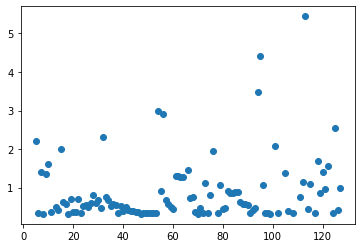

In [20]:
#scatter plots
y = CV['CV'].tolist()
x = CV.index.tolist()
plt.scatter(x,y)
plt.show()

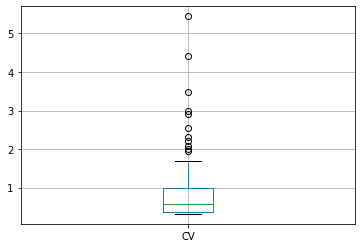

In [21]:
#box plots
boxplot = CV.boxplot(column='CV')

From the scatterplot, as well as the box plot, we can see many outliers in terms of significance. This is extremely obvious when looking at the boxplot, as you can see many points lie above the range of the plot's interval. From this, we can infer that there exists mant features that are not statistically significant.

# Fit a linear model using least squares to the training set and report the test error

In [22]:
#ViolentCrimesPerPop
ytrain = trainingset.iloc[:,-1:]
Xtrain = trainingset.drop(columns = ["Class 127"])

In [23]:
ytest = testingset.iloc[:,-1:]
Xtest = testingset.drop(columns = ["Class 127"])

In [24]:
LR = LinearRegression().fit(Xtrain, ytrain)
test_y_pred = LR.predict(Xtest)
print("Mean squared test errror: " + str(metrics.mean_squared_error(ytest, test_y_pred)))

Mean squared test errror: 0.01797697257164361


 # Ridge regression model on the training set, with lambda chosen by 5-fold cross validation. Report the test error obtained.

In [25]:
log10lambda = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]
lambdas = []
for i in log10lambda:
    lambdas.append(pow(10,i))
RCV = RidgeCV(alphas = lambdas, cv = 5).fit(Xtrain, ytrain)
test_y_pred = RCV.predict(Xtest)
print("Ridge Regression mean squared test error: " + str(metrics.mean_squared_error(ytest, test_y_pred)))

Ridge Regression mean squared test error: 0.017630963071705724


# Fit a LASSO model on the training set, with lambda chosen by 5-fold cross validation. 

In [26]:
pipeline = Pipeline([('scaler',StandardScaler()), ('model', Lasso())])
LCV = GridSearchCV(pipeline, {'model__alpha':lambdas}, cv=5, scoring="neg_mean_squared_error", verbose=3)
LCV.fit(Xtrain, ytrain)

Fitting 5 folds for each of 11 candidates, totalling 55 fits
[CV 1/5] END .............................model__alpha=1e-05; total time=   0.0s
[CV 2/5] END .............................model__alpha=1e-05; total time=   0.0s


C:\Users\Victor Hui\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.08026361626447, tolerance: 0.006791137683946488
  model = cd_fast.enet_coordinate_descent(
C:\Users\Victor Hui\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.9480531174664657, tolerance: 0.00660733681438127
  model = cd_fast.enet_coordinate_descent(
C:\Users\Victor Hui\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.668596574869584, tolerance: 0.006693136521739129
  model = cd_fast.enet_coordinate_descent(
C:\Users\Victor Hui\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_desce

[CV 3/5] END .............................model__alpha=1e-05; total time=   0.0s
[CV 4/5] END .............................model__alpha=1e-05; total time=   0.0s
[CV 5/5] END .............................model__alpha=1e-05; total time=   0.0s


C:\Users\Victor Hui\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.751416459607905, tolerance: 0.0069245812959866215
  model = cd_fast.enet_coordinate_descent(
C:\Users\Victor Hui\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.13357688127839396, tolerance: 0.006791137683946488
  model = cd_fast.enet_coordinate_descent(
C:\Users\Victor Hui\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.016151258546628355, tolerance: 0.00660733681438127
  model = cd_fast.enet_coordinate_descent(
C:\Users\Victor Hui\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate

[CV 1/5] END ............................model__alpha=0.0001; total time=   0.0s
[CV 2/5] END ............................model__alpha=0.0001; total time=   0.0s
[CV 3/5] END ............................model__alpha=0.0001; total time=   0.0s


C:\Users\Victor Hui\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.23094240633633234, tolerance: 0.006746416078595318
  model = cd_fast.enet_coordinate_descent(
C:\Users\Victor Hui\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2624491414689878, tolerance: 0.0069245812959866215
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END ............................model__alpha=0.0001; total time=   0.0s
[CV 5/5] END ............................model__alpha=0.0001; total time=   0.0s
[CV 1/5] END .............................model__alpha=0.001; total time=   0.0s
[CV 2/5] END .............................model__alpha=0.001; total time=   0.0s
[CV 3/5] END .............................model__alpha=0.001; total time=   0.0s
[CV 4/5] END .............................model__alpha=0.001; total time=   0.0s
[CV 5/5] END .............................model__alpha=0.001; total time=   0.0s
[CV 1/5] END ..............................model__alpha=0.01; total time=   0.0s
[CV 2/5] END ..............................model__alpha=0.01; total time=   0.0s
[CV 3/5] END ..............................model__alpha=0.01; total time=   0.0s
[CV 4/5] END ..............................model__alpha=0.01; total time=   0.0s
[CV 5/5] END ..............................model__alpha=0.01; total time=   0.0s
[CV 1/5] END ...............

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1,
                                          10, 100, 1000, 10000, 100000]},
             scoring='neg_mean_squared_error', verbose=3)

In [27]:
coefficients = LCV.best_estimator_.named_steps['model'].coef_
coefficients = np.abs(coefficients)
header = []
for i in range(5, 127):
    header.append("Class " + str(i))
print("The important classes are: ")
print(np.array(header)[coefficients > 0])

The important classes are: 
['Class 7' 'Class 11' 'Class 12' 'Class 16' 'Class 18' 'Class 19'
 'Class 20' 'Class 21' 'Class 22' 'Class 23' 'Class 26' 'Class 27'
 'Class 28' 'Class 29' 'Class 30' 'Class 31' 'Class 33' 'Class 34'
 'Class 38' 'Class 39' 'Class 43' 'Class 44' 'Class 45' 'Class 49'
 'Class 50' 'Class 51' 'Class 53' 'Class 54' 'Class 55' 'Class 56'
 'Class 58' 'Class 64' 'Class 66' 'Class 72' 'Class 73' 'Class 74'
 'Class 76' 'Class 77' 'Class 79' 'Class 80' 'Class 81' 'Class 83'
 'Class 87' 'Class 90' 'Class 91' 'Class 92' 'Class 93' 'Class 94'
 'Class 95' 'Class 96' 'Class 99' 'Class 104' 'Class 105' 'Class 107'
 'Class 109' 'Class 111' 'Class 112' 'Class 113' 'Class 115' 'Class 116'
 'Class 117' 'Class 118' 'Class 119' 'Class 120' 'Class 121' 'Class 123'
 'Class 124']


In [28]:
print("The unimportant classes are: ")
print(np.array(header)[coefficients == 0])

The unimportant classes are: 
['Class 5' 'Class 6' 'Class 8' 'Class 9' 'Class 10' 'Class 13' 'Class 14'
 'Class 15' 'Class 17' 'Class 24' 'Class 25' 'Class 32' 'Class 35'
 'Class 36' 'Class 37' 'Class 40' 'Class 41' 'Class 42' 'Class 46'
 'Class 47' 'Class 48' 'Class 52' 'Class 57' 'Class 59' 'Class 60'
 'Class 61' 'Class 62' 'Class 63' 'Class 65' 'Class 67' 'Class 68'
 'Class 69' 'Class 70' 'Class 71' 'Class 75' 'Class 78' 'Class 82'
 'Class 84' 'Class 85' 'Class 86' 'Class 88' 'Class 89' 'Class 97'
 'Class 98' 'Class 100' 'Class 101' 'Class 102' 'Class 103' 'Class 106'
 'Class 108' 'Class 110' 'Class 114' 'Class 122' 'Class 125' 'Class 126']


In [29]:
test_y_pred = LCV.predict(Xtest)
print("Unstandardized Mean squared test errror: " + str(metrics.mean_squared_error(ytest, test_y_pred)))

Unstandardized Mean squared test errror: 0.017643943730464504


Repeat with standardized features

In [30]:
scaler = preprocessing.StandardScaler().fit(Xtrain)
Xtrain_scaled = scaler.transform(Xtrain)

pipeline = Pipeline([('scaler',StandardScaler()), ('model', Lasso())])
LCV = GridSearchCV(pipeline, {'model__alpha':lambdas}, cv=5, scoring="neg_mean_squared_error", verbose=3)
LCV.fit(Xtrain_scaled, ytrain)


Fitting 5 folds for each of 11 candidates, totalling 55 fits
[CV 1/5] END .............................model__alpha=1e-05; total time=   0.0s
[CV 2/5] END .............................model__alpha=1e-05; total time=   0.0s


C:\Users\Victor Hui\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.080263616264315, tolerance: 0.006791137683946488
  model = cd_fast.enet_coordinate_descent(
C:\Users\Victor Hui\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.948053117470179, tolerance: 0.00660733681438127
  model = cd_fast.enet_coordinate_descent(
C:\Users\Victor Hui\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.668596574869143, tolerance: 0.006693136521739129
  model = cd_fast.enet_coordinate_descent(
C:\Users\Victor Hui\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_desce

[CV 3/5] END .............................model__alpha=1e-05; total time=   0.0s
[CV 4/5] END .............................model__alpha=1e-05; total time=   0.0s
[CV 5/5] END .............................model__alpha=1e-05; total time=   0.0s


C:\Users\Victor Hui\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.7514164596084045, tolerance: 0.0069245812959866215
  model = cd_fast.enet_coordinate_descent(
C:\Users\Victor Hui\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.1335768812788558, tolerance: 0.006791137683946488
  model = cd_fast.enet_coordinate_descent(
C:\Users\Victor Hui\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.016151258546642566, tolerance: 0.00660733681438127
  model = cd_fast.enet_coordinate_descent(
C:\Users\Victor Hui\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate

[CV 1/5] END ............................model__alpha=0.0001; total time=   0.0s
[CV 2/5] END ............................model__alpha=0.0001; total time=   0.0s
[CV 3/5] END ............................model__alpha=0.0001; total time=   0.0s
[CV 4/5] END ............................model__alpha=0.0001; total time=   0.0s


C:\Users\Victor Hui\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.23094240633644958, tolerance: 0.006746416078595318
  model = cd_fast.enet_coordinate_descent(
C:\Users\Victor Hui\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2624491414684833, tolerance: 0.0069245812959866215
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END ............................model__alpha=0.0001; total time=   0.0s
[CV 1/5] END .............................model__alpha=0.001; total time=   0.0s
[CV 2/5] END .............................model__alpha=0.001; total time=   0.0s
[CV 3/5] END .............................model__alpha=0.001; total time=   0.0s
[CV 4/5] END .............................model__alpha=0.001; total time=   0.0s
[CV 5/5] END .............................model__alpha=0.001; total time=   0.0s
[CV 1/5] END ..............................model__alpha=0.01; total time=   0.0s
[CV 2/5] END ..............................model__alpha=0.01; total time=   0.0s
[CV 3/5] END ..............................model__alpha=0.01; total time=   0.0s
[CV 4/5] END ..............................model__alpha=0.01; total time=   0.0s
[CV 5/5] END ..............................model__alpha=0.01; total time=   0.0s
[CV 1/5] END ...............................model__alpha=0.1; total time=   0.0s
[CV 2/5] END ...............

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1,
                                          10, 100, 1000, 10000, 100000]},
             scoring='neg_mean_squared_error', verbose=3)

In [31]:
coefficients = LCV.best_estimator_.named_steps['model'].coef_
coefficients = np.abs(coefficients)
header = []
for i in range(5, 127):
    header.append("Class " + str(i))
print("The important classes are: ")
print(np.array(header)[coefficients > 0])

The important classes are: 
['Class 7' 'Class 11' 'Class 12' 'Class 16' 'Class 18' 'Class 19'
 'Class 20' 'Class 21' 'Class 22' 'Class 23' 'Class 26' 'Class 27'
 'Class 28' 'Class 29' 'Class 30' 'Class 31' 'Class 33' 'Class 34'
 'Class 38' 'Class 39' 'Class 43' 'Class 44' 'Class 45' 'Class 49'
 'Class 50' 'Class 51' 'Class 53' 'Class 54' 'Class 55' 'Class 56'
 'Class 58' 'Class 64' 'Class 66' 'Class 72' 'Class 73' 'Class 74'
 'Class 76' 'Class 77' 'Class 79' 'Class 80' 'Class 81' 'Class 83'
 'Class 87' 'Class 90' 'Class 91' 'Class 92' 'Class 93' 'Class 94'
 'Class 95' 'Class 96' 'Class 99' 'Class 104' 'Class 105' 'Class 107'
 'Class 109' 'Class 111' 'Class 112' 'Class 113' 'Class 115' 'Class 116'
 'Class 117' 'Class 118' 'Class 119' 'Class 120' 'Class 121' 'Class 123'
 'Class 124']


In [32]:
print("The unimportant classes are: ")
print(np.array(header)[coefficients == 0])

The unimportant classes are: 
['Class 5' 'Class 6' 'Class 8' 'Class 9' 'Class 10' 'Class 13' 'Class 14'
 'Class 15' 'Class 17' 'Class 24' 'Class 25' 'Class 32' 'Class 35'
 'Class 36' 'Class 37' 'Class 40' 'Class 41' 'Class 42' 'Class 46'
 'Class 47' 'Class 48' 'Class 52' 'Class 57' 'Class 59' 'Class 60'
 'Class 61' 'Class 62' 'Class 63' 'Class 65' 'Class 67' 'Class 68'
 'Class 69' 'Class 70' 'Class 71' 'Class 75' 'Class 78' 'Class 82'
 'Class 84' 'Class 85' 'Class 86' 'Class 88' 'Class 89' 'Class 97'
 'Class 98' 'Class 100' 'Class 101' 'Class 102' 'Class 103' 'Class 106'
 'Class 108' 'Class 110' 'Class 114' 'Class 122' 'Class 125' 'Class 126']


In [33]:
test_y_pred = LCV.predict(Xtest)
print("Standardized Mean squared test errror: " + str(metrics.mean_squared_error(ytest, test_y_pred)))

Standardized Mean squared test errror: 0.03547813117203263


Both the unstandardized features and standardized features yielded the same result when generating the important and unimportant classes (i.e. they have the same important/unimportant classes). However, unstandardized features generated a mean squared test error of 0.01764 while standardized features yielded a mean squared test error of 0.035478. Making the unstandardized features Lasso model more accurate. 

# Fit random forest models to the trainingset

In [36]:
B = [] #number of trees in the forest
for i in range (1, 301):
    B.append(i)
m = math.floor(math.sqrt(123))
train_error = []
OOB_error = []
test_error = []
ytrain = np.ravel(ytrain)
ytest = np.ravel(ytest)
for i in B:
    RGR = RandomForestRegressor(max_features = m, max_samples = i, random_state = 0, oob_score = True)
    RGR.fit(Xtrain, ytrain)
    train_y_pred = RGR.predict(Xtrain)
    train_error.append(metrics.mean_squared_error(ytrain, train_y_pred))
    test_y_pred = RGR.predict(Xtest)
    test_error.append(metrics.mean_squared_error(ytest, test_y_pred))
    OOB_error.append(1-RGR.oob_score_)

In [40]:
#m = 122
B = []
for i in range (1, 301):
    B.append(i)
m2 = 122
m2_train_error = []
m2_OOB_error = []
m2_test_error = []
for i in B:
    RGR = RandomForestRegressor(max_features = m2, max_samples = i, random_state = 0, oob_score = True)
    RGR.fit(Xtrain, ytrain)
    train_y_pred = RGR.predict(Xtrain)
    m2_train_error.append(metrics.mean_squared_error(ytrain, train_y_pred))
    test_y_pred = RGR.predict(Xtest)
    m2_test_error.append(metrics.mean_squared_error(ytest, test_y_pred))
    m2_OOB_error.append(1-RGR.oob_score_)

m1 = floor(root(123)), m2 = 122


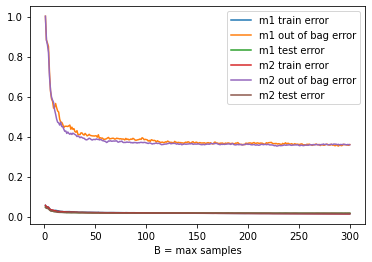

In [49]:
plt.plot(B, train_error)
plt.plot(B, OOB_error)
plt.plot(B, test_error)
plt.plot(B, m2_train_error)
plt.plot(B, m2_OOB_error)
plt.plot(B, m2_test_error)
plt.xlabel("B = max samples")
plt.legend(["m1 train error", "m1 out of bag error", "m1 test error", "m2 train error", "m2 out of bag error", "m2 test error"])
print("m1 = floor(root(123)), m2 = 122")

 # Build a variable importance plot from your random forest.

<AxesSubplot:title={'center':'Variable importance plot (top 10 most important features)'}>

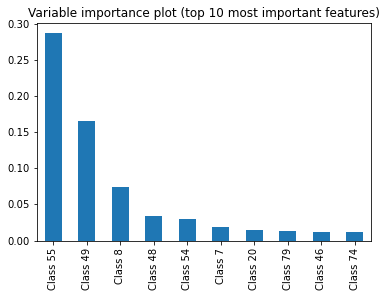

In [60]:
feature_names = []
for i in range(5, 127):
    feature_names.append("Class " + str(i))
importances = RGR.feature_importances_
forest_importances = pd.Series(importances, index = feature_names)
forest_importances = forest_importances.nlargest(10)
fig, ax = plt.subplots()
ax.set_title("Variable importance plot (top 10 most important features)")
forest_importances.plot.bar(ax=ax)

# Use bootstrap subsamples whose size is 20% of the dataset.

In [78]:
m = math.floor(math.sqrt(123))
train_error = []
OOB_error = []
test_error = []
ytrain = np.ravel(ytrain)
ytest = np.ravel(ytest)

Xtrain = Xtrain.apply(preprocessing.LabelEncoder().fit_transform)
lab_enc = preprocessing.LabelEncoder()
ytrain = lab_enc.fit_transform(ytrain)

ETC = ExtraTreesClassifier(max_features = m, bootstrap = True, max_samples = 0.2, oob_score = True)
ETC.fit(Xtrain, ytrain)
train_y_pred = ETC.predict(Xtrain)
train_error.append(metrics.mean_squared_error(ytrain, train_y_pred))
test_y_pred = ETC.predict(Xtest)
test_error.append(metrics.mean_squared_error(ytest, test_y_pred))
OOB_error.append(1-ETC.oob_score_)

In [79]:
ytrain = trainingset.iloc[:,-1:]
Xtrain = trainingset.drop(columns = ["Class 127"])
ytest = testingset.iloc[:,-1:]
Xtest = testingset.drop(columns = ["Class 127"])
ytrain = np.ravel(ytrain)
ytest = np.ravel(ytest)

m2 = 122
m2_train_error = []
m2_OOB_error = []
m2_test_error = []

Xtrain = Xtrain.apply(preprocessing.LabelEncoder().fit_transform)
lab_enc = preprocessing.LabelEncoder()
ytrain = lab_enc.fit_transform(ytrain)

ETC = ExtraTreesClassifier(max_features = m2, max_samples = 0.2, bootstrap = True, random_state = 0, oob_score = True)
ETC.fit(Xtrain, ytrain)
train_y_pred = ETC.predict(Xtrain)
m2_train_error.append(metrics.mean_squared_error(ytrain, train_y_pred))
test_y_pred = ETC.predict(Xtest)
m2_test_error.append(metrics.mean_squared_error(ytest, test_y_pred))
m2_OOB_error.append(1-ETC.oob_score_)

In [80]:
print("m1 = floor(root(123)), m2 = 122")
print("m1 train error is: " + str(train_error))
print("m1 OOB error is: " + str(OOB_error))
print("m1 test error is: " + str(test_error))

m1 = floor(root(123)), m2 = 122
m1 train error is: [12.511036789297659]
m1 OOB error is: [0.9210702341137124]
m1 test error is: [7.719900200400802]


In [81]:
print("m2 train error is: " + str(m2_train_error))
print("m2 OOB error is: " + str(m2_OOB_error))
print("m2 test error is: " + str(m2_test_error))

m2 train error is: [31.557190635451505]
m2 OOB error is: [0.9117056856187291]
m2 test error is: [14.368196793587174]


<AxesSubplot:title={'center':'Variable importance plot (top 10 most important features)'}>

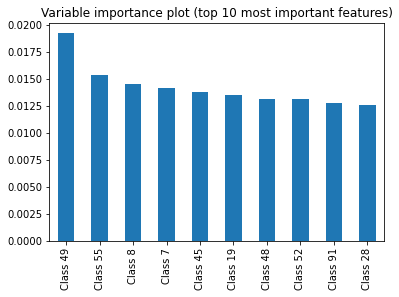

In [82]:
feature_names = []
for i in range(5, 127):
    feature_names.append("Class " + str(i))
importances = ETC.feature_importances_
forest_importances = pd.Series(importances, index = feature_names)
forest_importances = forest_importances.nlargest(10)
fig, ax = plt.subplots()
ax.set_title("Variable importance plot (top 10 most important features)")
forest_importances.plot.bar(ax=ax)